In [1]:
import pandas as pd

# Load the dataset
file_path = r"C:\Users\amena\OneDrive - ESPRIT\Bureau\data\historique_achats_100000.csv"
df = pd.read_csv(file_path)

# Display basic information about the dataset
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   client_id    100000 non-null  int64 
 1   commande_id  100000 non-null  int64 
 2   produit      100000 non-null  object
 3   marque       100000 non-null  object
 4   taille       100000 non-null  object
 5   prix         100000 non-null  object
 6   date_achat   100000 non-null  object
dtypes: int64(2), object(5)
memory usage: 5.3+ MB


(None,
    client_id  commande_id                   produit          marque  \
 0       1001         4930    Chamia aux fruits secs       SHEHRAZAD   
 1       1001         4930           SCHWEPPES Tonic       SCHWEPPES   
 2       1001         4930  Eau minérale MARWA 0.75L           MARWA   
 3       1001         4930                BOGA cidre            BOGA   
 4       9267           68               Sauce pizza  LE PETIT PARIS   
 
                   taille       prix  date_achat  
 0       La boite de 800g  24 dt 800  2024-03-27  
 1   La bouteille de 0.5L     1dt855  2024-03-27  
 2  La bouteille de 0.75L     0dt460  2024-03-27  
 3     La canette de 24cl     1dt160  2024-03-27  
 4       La boite de 400g   2 dt 840  2024-03-19  )

In [4]:
# Analyse des valeurs nulles
missing_values = df.isnull().sum()
missing_values

0
1001                           0
4930                         948
Chamia aux fruits secs      1026
SHEHRAZAD                   2004
La boite de 800g            2137
24 dt 800                   3302
2024-03-27                  3327
None                      101660
None                      102191
None                      102206
None                      102206
None                      102206
None                      102206
None                      102206
dtype: int64

In [5]:


# Analyse des valeurs uniques pour détecter d'éventuelles erreurs d'écriture
unique_values = df.nunique()
unique_values

0
1001                       8443
4930                      12071
Chamia aux fruits secs     3040
SHEHRAZAD                   626
La boite de 800g           1049
24 dt 800                  1495
2024-03-27                  186
None                        135
None                         15
None                          1
None                          1
None                          1
None                          1
None                         23
dtype: int64

In [6]:


# Analyse des statistiques descriptives pour détecter les valeurs aberrantes

stats = df.describe()
stats

,1001,4930,Chamia aux fruits secs,SHEHRAZAD,La boite de 800g,24 dt 800,2024-03-27,None,None,None,None,None,None,None
count,102233,101285,101207,100229,100096,98931,98906,573,42,27,27,27,27,27
unique,8443,12071,3040,626,1049,1495,186,135,15,1,1,1,1,23
top,Produit italien,19 dt 863,Huile d'olive extra vierge,DÉLICE DANONE,Le paquet de 500g,0 dt 410,2024-06-20,acide citrique (E330),conservateur (E202),arômes naturels,colorants (E160a-E160e),"vitamines A-C-E.""",3dt190,2024-04-14
freq,91,90,1128,1947,4518,1773,2124,27,27,27,27,27,27,3


Données propres (pas de valeurs manquantes).
Base de clients et de commandes relativement variée.
Présence d’un bon nombre de marques et de tailles, ce qui peut suggérer un marché diversifié.
Les commandes sont bien distribuées entre les clients, ce qui peut être intéressant pour analyser les habitudes d’achat.

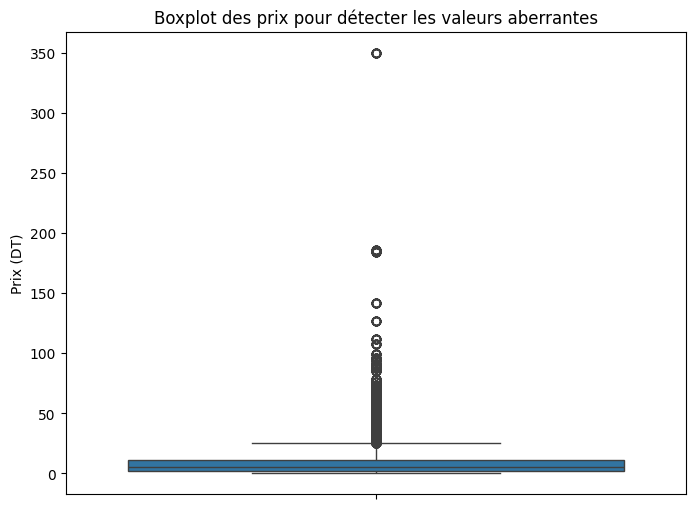

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Fonction pour convertir le prix en format numérique
def convert_price(price):
    # Extraire tous les chiffres et les joindre pour former un nombre décimal
    numbers = re.findall(r'\d+', str(price))
    if len(numbers) == 2:
        return float(numbers[0]) + float(numbers[1]) / 1000  # Convertir en Dinar.TroisDécimales
    elif len(numbers) == 1:
        return float(numbers[0])
    return None

# Appliquer la conversion
df["prix_numerique"] = df["prix"].apply(convert_price)

# Filtrer les valeurs valides
df_valid_prices = df.dropna(subset=["prix_numerique"])

# Tracer le boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(y=df_valid_prices["prix_numerique"])
plt.title("Boxplot des prix pour détecter les valeurs aberrantes")
plt.ylabel("Prix (DT)")
plt.show()


La distribution des prix est fortement asymétrique, avec une majorité de valeurs faibles et quelques prix extrêmement élevés.n/
Ces valeurs aberrantes méritent d’être analysées plus en détail pour éviter qu'elles influencent négativement les statistiques et les modèles prédictifs.


📌 Basic Information

Shape of dataset: (102234, 1)
client_id,commande_id,produit,marque,taille,prix,date_achat    object
dtype: object

📌 Total Duplicate Rows: 1228


📌 Numerical Summary

       client_id,commande_id,produit,marque,taille,prix,date_achat
count                                              102234         
unique                                             101006         
top                                       Produit italien         
freq                                                   91         

📌 Categorical Summary

       client_id,commande_id,produit,marque,taille,prix,date_achat
count                                              102234         
unique                                             101006         
top                                       Produit italien         
freq                                                   91         

📌 Outlier Detection


📌 Data Quality Checks

client_id,commande_id,produit,marque,taille,prix,date_achat: 101006 uni

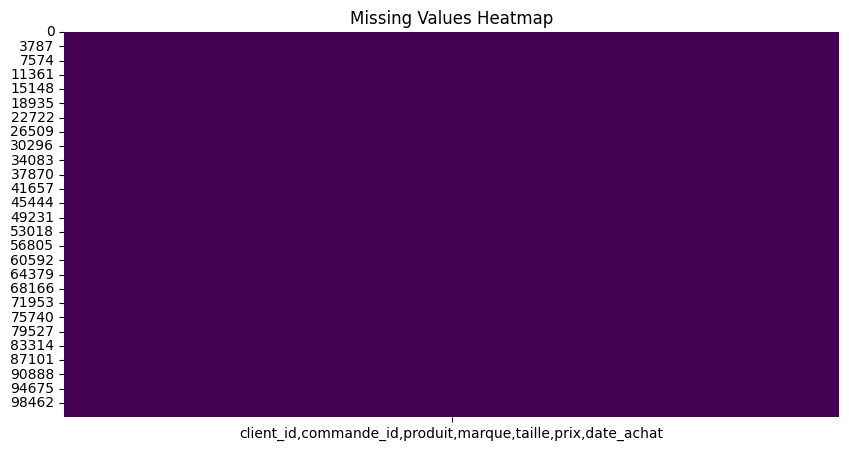


📌 Final Data Discovery Report

╒════╤═════════════════════════════════════════════════════════════╤════════╤══════════════════════╤═════════════════╤════════════╕
│    │ Column Name                                                 │ Type   │ Missing Values (%)   │   Unique Values │ Outliers   │
╞════╪═════════════════════════════════════════════════════════════╪════════╪══════════════════════╪═════════════════╪════════════╡
│  0 │ client_id,commande_id,produit,marque,taille,prix,date_achat │ object │ 0.00%                │          101006 │ N/A        │
╘════╧═════════════════════════════════════════════════════════════╧════════╧══════════════════════╧═════════════════╧════════════╛


In [8]:

# Enhanced Data Discovery Report with Error Handling

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

# Load dataset with error handling for inconsistent rows
file_path = r"C:\Users\amena\OneDrive - ESPRIT\Bureau\data\historique_achats_100000.csv" # Ensure this file exists in your environment
df = pd.read_csv(file_path, delimiter=";", encoding="utf-8", low_memory=False, on_bad_lines='skip')
df.columns = df.columns.str.strip()  # Clean column names

# 1. Basic Information
print("\n📌 Basic Information\n")
print(f"Shape of dataset: {df.shape}")
print(df.dtypes)

# 2. Missing Values Analysis
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
if not missing_values.empty:
    print("\n📌 Missing Values\n")
    print(missing_values)

# 3. Duplicate Detection
duplicate_count = df.duplicated().sum()
print(f"\n📌 Total Duplicate Rows: {duplicate_count}\n")

# 4. Statistical Summary
print("\n📌 Numerical Summary\n")
print(df.describe())

print("\n📌 Categorical Summary\n")
print(df.describe(include=['object']))

# 5. Outlier Detection using IQR method
numerical_cols = df.select_dtypes(include=['number']).columns
outliers = {}
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outlier_count = ((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))).sum()
    outliers[col] = outlier_count

print("\n📌 Outlier Detection\n")
for col, count in outliers.items():
    print(f"{col}: {count} outliers detected")

# 6. Data Quality Checks - Spotting Potential Formatting Issues
print("\n📌 Data Quality Checks\n")
for col in df.columns:
    if df[col].dtype == 'object':
        unique_values = df[col].nunique()
        print(f"{col}: {unique_values} unique values")

# 7. Visualizations of Distributions
plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

# Generate a structured report similar to the screenshot
data_discovery_report = pd.DataFrame(columns=[
    "Column Name", "Type", "Missing Values (%)", "Unique Values", "Outliers"
])

for col in df.columns:
    col_type = df[col].dtype  # Get data type
    missing_percent = (df[col].isnull().sum() / len(df)) * 100  # Missing value percentage
    unique_values = df[col].nunique()  # Count of unique values
    outlier_count = outliers.get(col, "N/A")  # Get outlier count if numeric

    data_discovery_report = pd.concat([data_discovery_report, pd.DataFrame([{
        "Column Name": col,
        "Type": col_type,
        "Missing Values (%)": f"{missing_percent:.2f}%",
        "Unique Values": unique_values,
        "Outliers": outlier_count
    }])], ignore_index=True)

# Display the structured report
formatted_report = tabulate(data_discovery_report, headers="keys", tablefmt="fancy_grid")
print("\n📌 Final Data Discovery Report\n")
print(formatted_report)
